In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../data/data_04_may_2016.csv')

In [3]:
data.describe()

,name.1,name_desc,desc,lib,return_vals,env,files,exit_status,diagnostics,errors,md5_hash,machine,total_score
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.0,833.000000,833.000000
mean,4.952425,0.130644,0.000973,0.000408,0.000016,0.003084,0.000267,0.001263,0.005522,0.000132,0.0,0.001015,8.396721
std,5.919039,0.423211,0.003298,0.007566,0.000154,0.008438,0.001871,0.003217,0.056579,0.001063,0.0,0.013071,5.598393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.425255
50%,0.650481,0.000000,0.000128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,7.660518
75%,10.217565,0.025567,0.000586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,13.065621
max,21.076316,5.207017,0.042552,0.168964,0.003423,0.088175,0.048035,0.013688,1.371927,0.019230,0.0,0.169120,24.000566


In [4]:
data = data.drop('md5_hash', axis=1)


In [5]:
data.columns

Index(['name', 'section', 'query', 'name.1', 'name_desc', 'desc', 'lib',
       'return_vals', 'env', 'files', 'exit_status', 'diagnostics', 'errors',
       'machine', 'total_score'],
      dtype='object')

In [6]:
df = data.drop(['name', 'query'], axis=1)

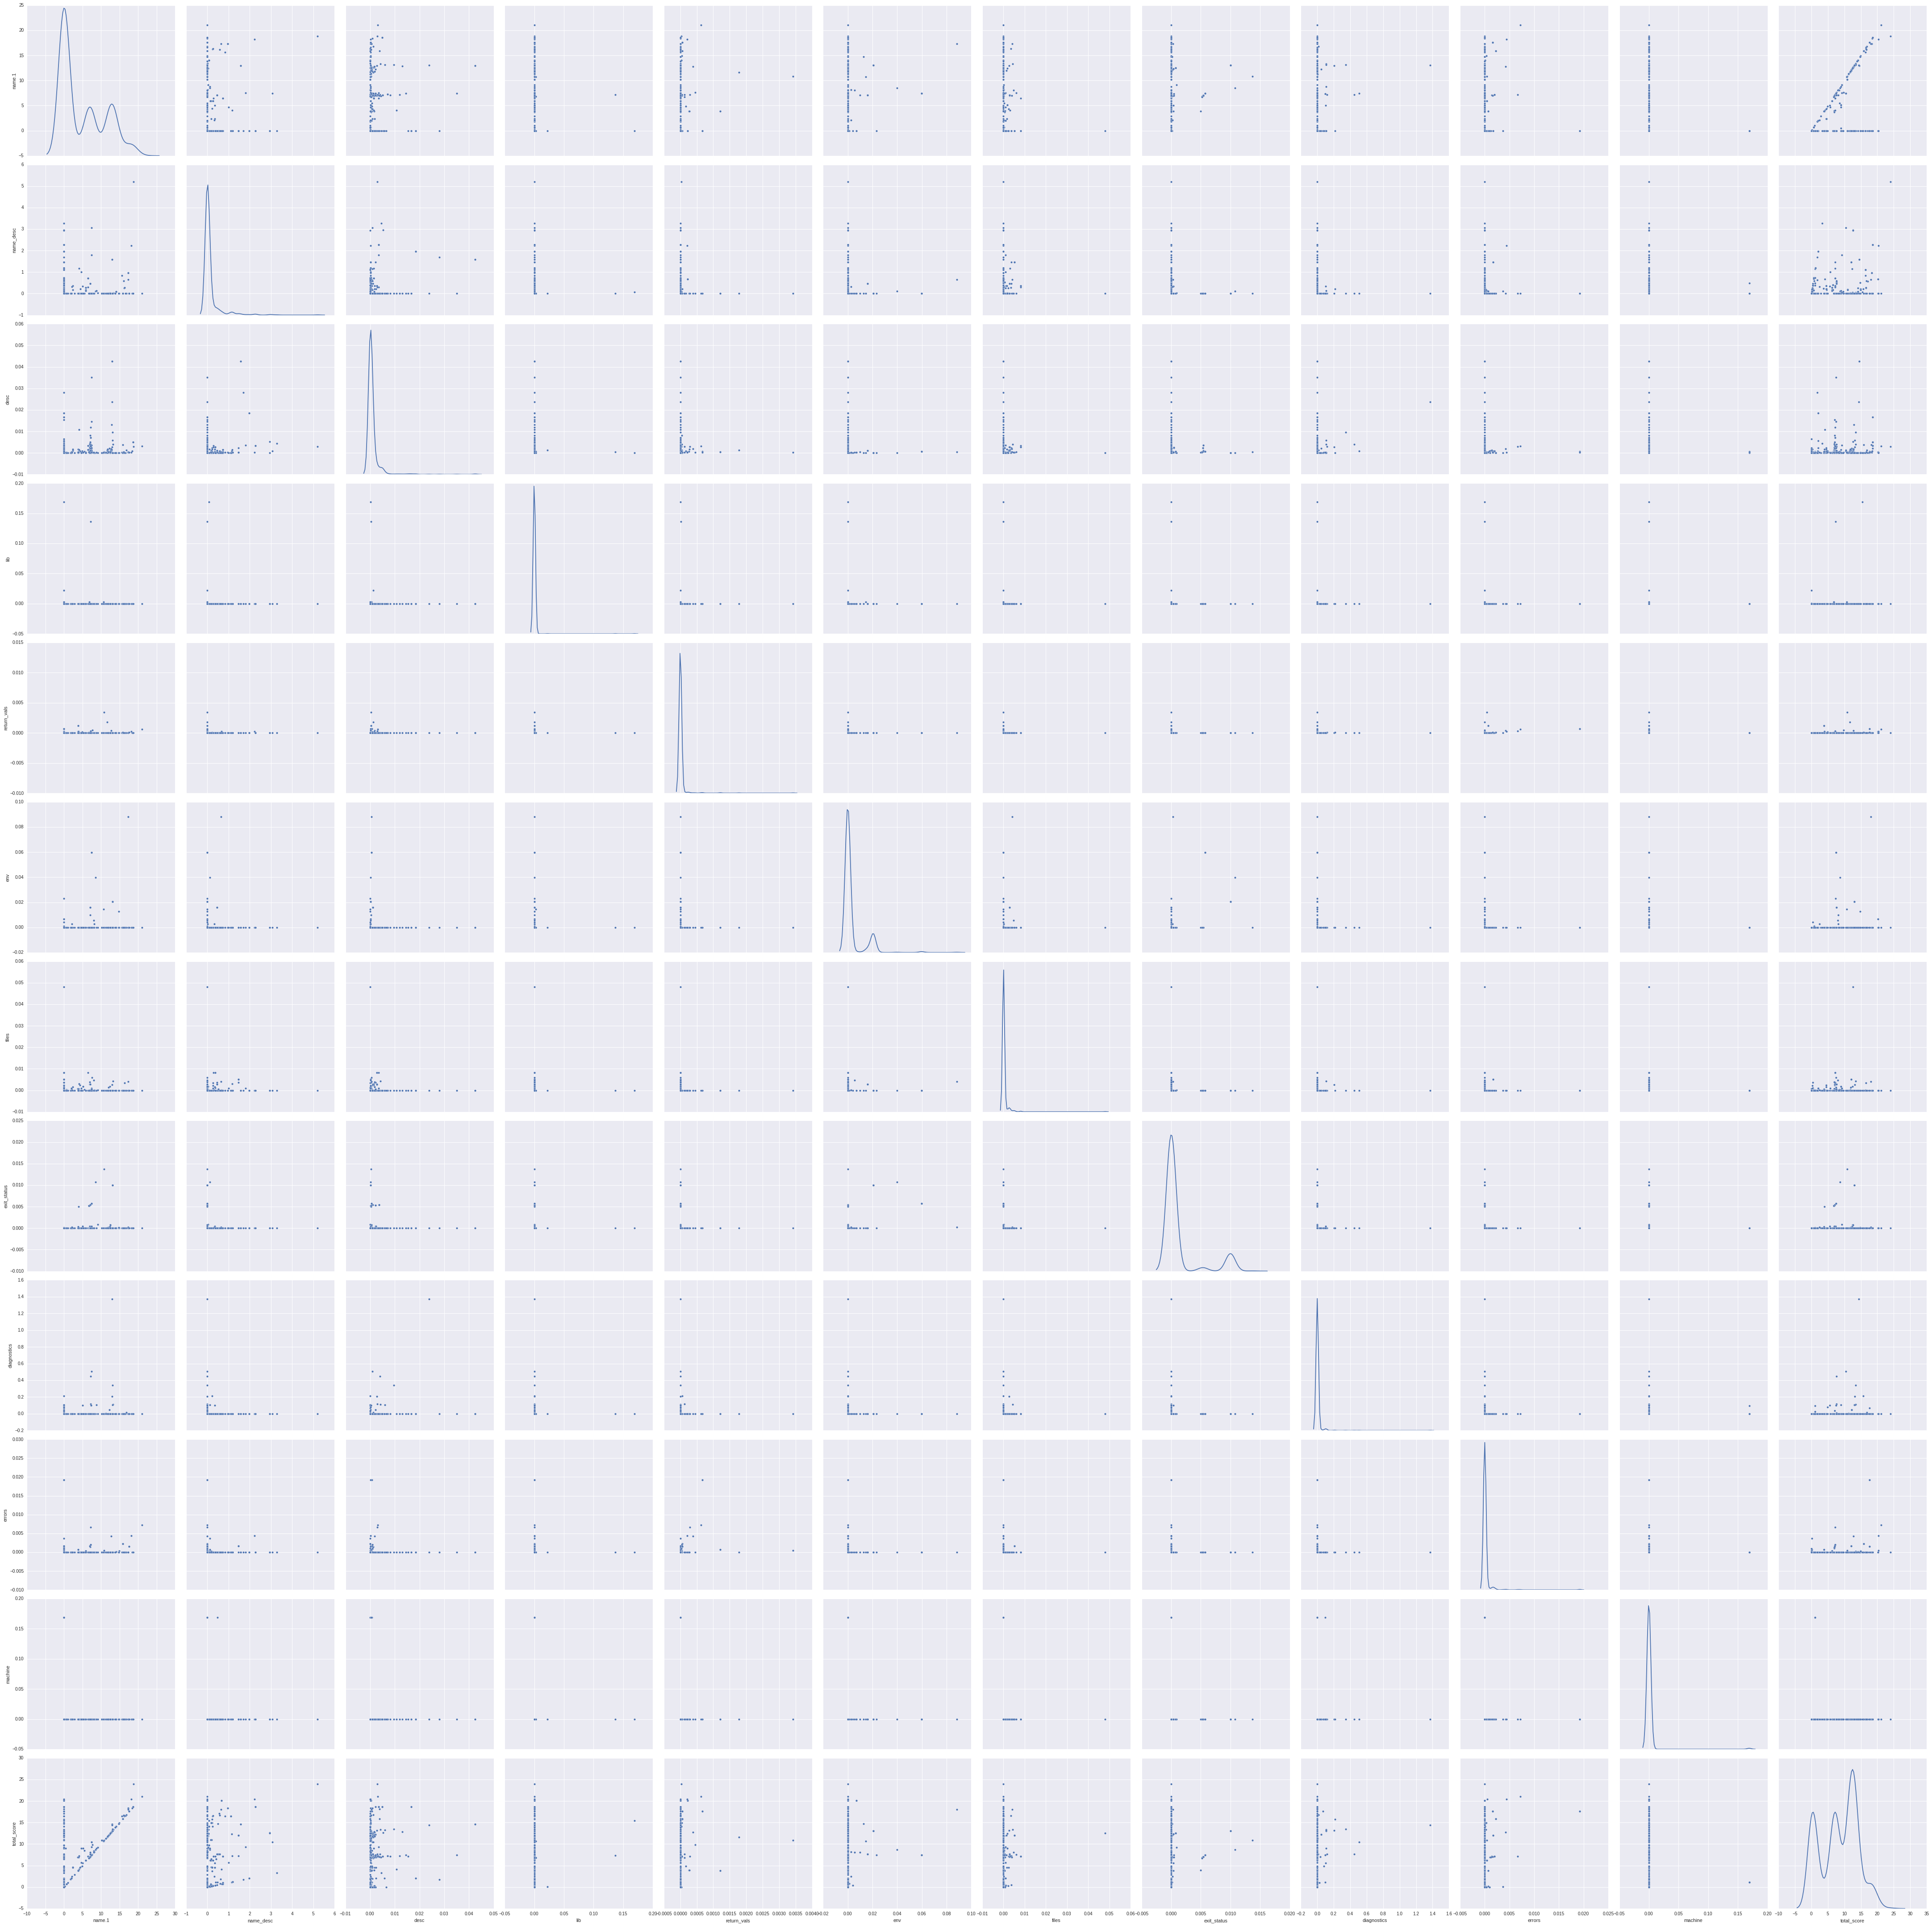

In [7]:
sns.pairplot(df, diag_kind='kde', size=5)

In [8]:
df.columns

Index(['section', 'name.1', 'name_desc', 'desc', 'lib', 'return_vals', 'env',
       'files', 'exit_status', 'diagnostics', 'errors', 'machine',
       'total_score'],
      dtype='object')

In [9]:
X = df.ix[:, 1:-1]


In [10]:
X.columns

Index(['name.1', 'name_desc', 'desc', 'lib', 'return_vals', 'env', 'files',
       'exit_status', 'diagnostics', 'errors', 'machine'],
      dtype='object')

In [11]:
y = df.ix[:, -1:]

In [190]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.ravel(), test_size=0.10, random_state=43)
X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=43)

In [191]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
stdscaler.fit(X_train)
X_train= stdscaler.transform(X_train)
X_val = stdscaler.transform(X_val)
X_test= stdscaler.transform(X_test)


In [192]:
from sklearn.ensemble import RandomForestRegressor

In [193]:
rf = RandomForestRegressor(n_estimators=600, max_depth=18, max_features=10, min_samples_split=2)

In [194]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [195]:
rf.score(X_train, y_train)

0.93145308167674612

In [196]:
rf.score(X_val, y_val)

0.72743440839458562

In [197]:
rf.feature_importances_

array([ 0.42724085,  0.19439416,  0.27197902,  0.00289671,  0.02452533,
        0.02213379,  0.02279731,  0.00517409,  0.00594137,  0.02126729,
        0.00165008])

In [112]:
from sklearn.grid_search import GridSearchCV

In [113]:
params = {'n_estimators': [200, 300, 500, 600], 'max_depth': [15,18,20,25,30,50], 'max_features': [6,8,10]}
gridsearch = GridSearchCV(rf, param_grid=params, scoring='mean_squared_error', n_jobs=-1)

In [114]:
f = gridsearch.fit(X_train, y_train)

/home/abhinav/miniconda3/envs/cadl/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/abhinav/miniconda3/envs/cadl/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/abhinav/miniconda3/envs/cadl/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/abhinav/miniconda3/envs/cadl/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be remo

In [115]:
f.best_estimator_.score(X_test, y_test)

0.58669451854245214

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

In [266]:
gboost = GradientBoostingRegressor(n_estimators=560, max_depth=15,learning_rate=0.01, min_samples_split=6, max_features='log2')

In [267]:
gboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=15,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=560, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [268]:
gboost.score(X_train, y_train)

0.94143353299147714

In [269]:
gboost.score(X_val, y_val)

0.71387932789924202

In [270]:
gboost.feature_importances_

array([ 0.16485954,  0.14278876,  0.55846507,  0.00989691,  0.01590778,
        0.02463945,  0.03493583,  0.01608527,  0.00636958,  0.02307836,
        0.00297345])

In [271]:
from sklearn.neural_network import MLPRegressor

In [371]:
mlp = MLPRegressor(hidden_layer_sizes=(15,10,5), learning_rate='adaptive', activation='relu', max_iter=1000,  solver='lbgfs', momentum=0.9)

In [372]:
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 10, 5), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbgfs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [373]:
mlp.score(X_train, y_train)

0.69749758830752362

In [374]:
mlp.score(X_val, y_val)

0.21609215707110707

In [330]:
mlp.score?